In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\amelia.quek\Documents\train_split.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   member_id                    63999 non-null  int64  
 1   loan_amnt                    63999 non-null  int64  
 2   funded_amnt                  63999 non-null  int64  
 3   funded_amnt_inv              63999 non-null  float64
 4   term                         63999 non-null  object 
 5   batch_enrolled               53735 non-null  object 
 6   int_rate                     63999 non-null  float64
 7   grade                        63999 non-null  object 
 8   sub_grade                    63999 non-null  object 
 9   emp_title                    60173 non-null  object 
 10  emp_length                   60675 non-null  object 
 11  home_ownership               63999 non-null  object 
 12  annual_inc                   63999 non-null  float64
 13  verification_sta

In [4]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0


## Data Exploratory

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,63999.0,3.483010e+07,2.414002e+07,70694.00,10800446.00,36936262.00,58419283.00,73519746.00
loan_amnt,63999.0,1.478045e+04,8.406762e+03,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt,63999.0,1.476789e+04,8.402237e+03,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt_inv,63999.0,1.472997e+04,8.413262e+03,0.00,8000.00,13000.00,20000.00,35000.00
int_rate,63999.0,1.324293e+01,4.366605e+00,5.32,9.99,12.99,16.20,28.99
annual_inc,63999.0,7.493590e+04,5.442621e+04,4800.00,45000.00,64500.00,90000.00,3964280.00
dti,63999.0,1.817837e+01,8.270375e+00,0.00,11.96,17.69,24.01,72.30
delinq_2yrs,63999.0,3.170362e-01,8.680514e-01,0.00,0.00,0.00,0.00,27.00
inq_last_6mths,63999.0,7.019172e-01,1.007678e+00,0.00,0.00,0.00,1.00,28.00
mths_since_last_delinq,31168.0,3.390211e+01,2.179558e+01,0.00,15.00,30.00,50.00,136.00


<AxesSubplot:xlabel='loan_status', ylabel='count'>

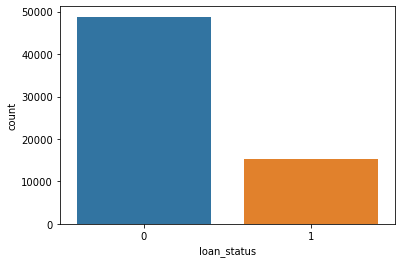

In [6]:
sns.countplot(x='loan_status',data=df)

C:\Users\amelia.quek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 40000.0)

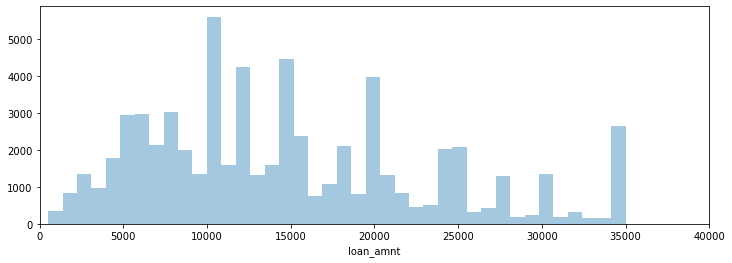

In [7]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,40000)

(30.0, 0.0)

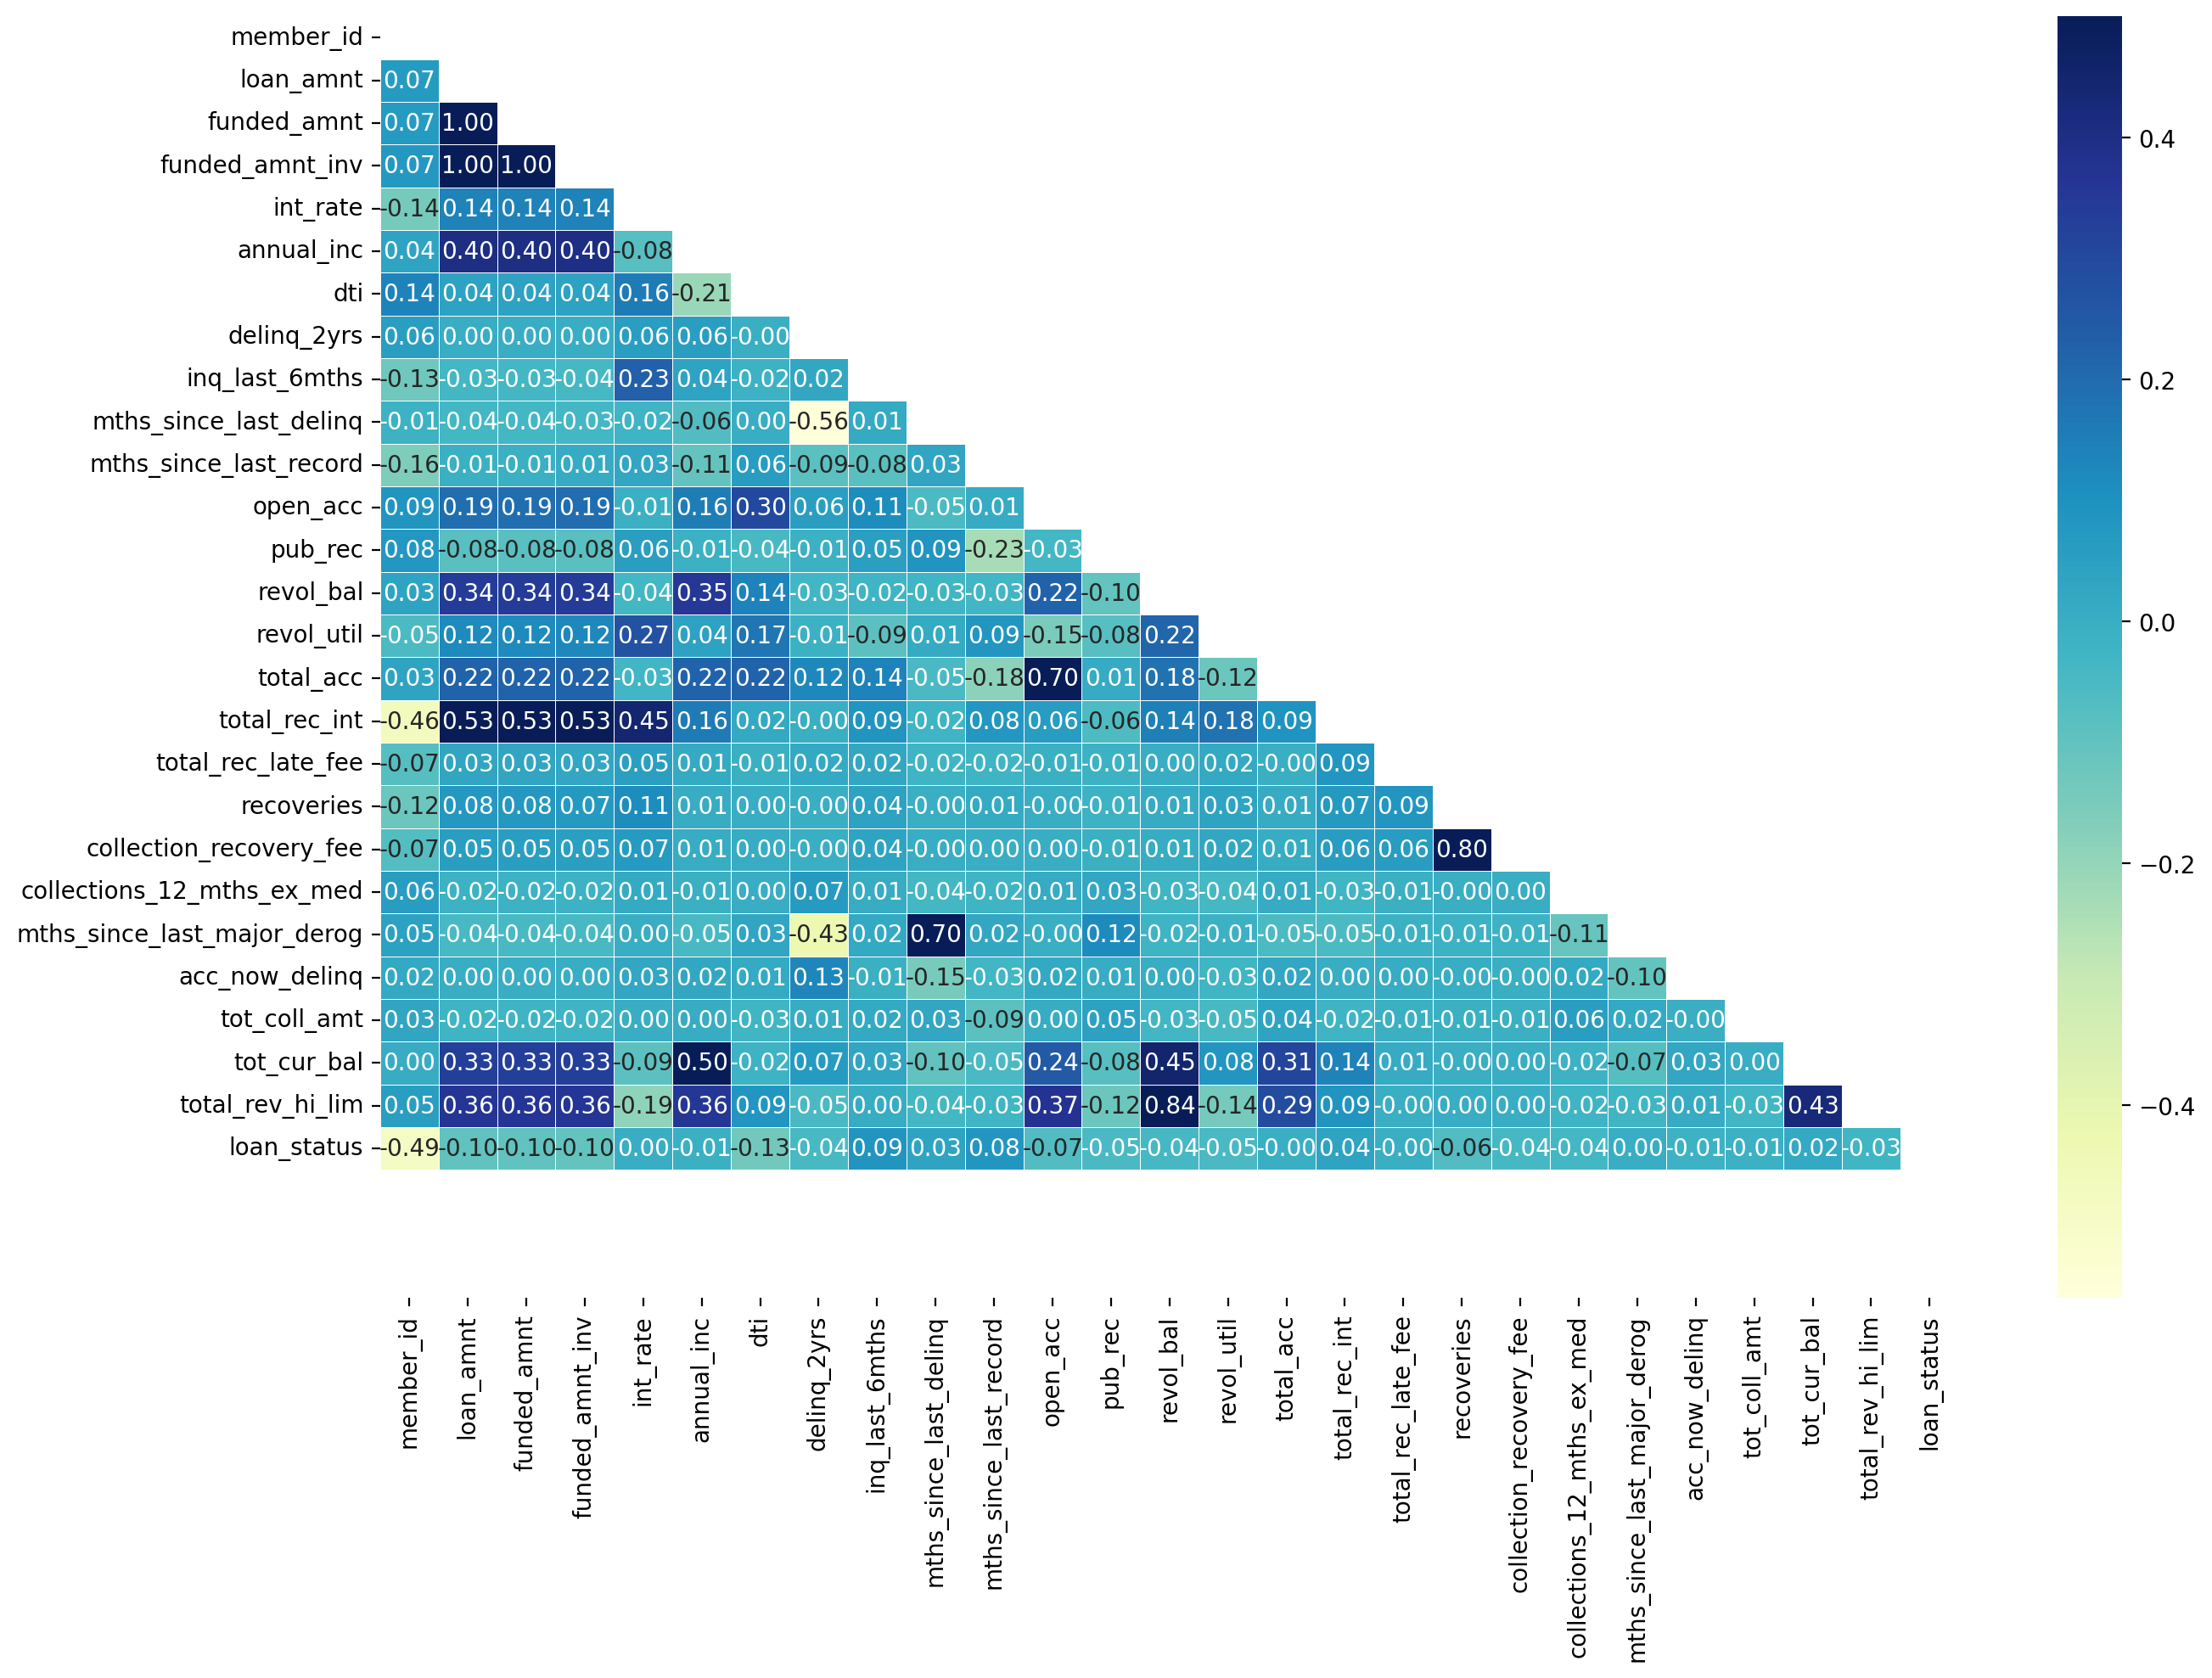

In [8]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10),dpi = 200)
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.ylim(30,0)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

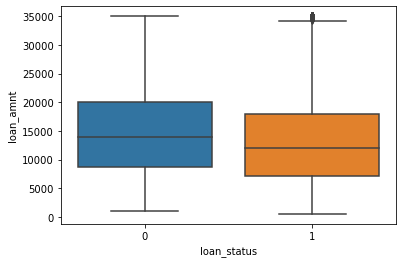

In [9]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [10]:
#summary statistics for the loan amount, grouped by the loan_status

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,48802.0,15240.472727,8484.497442,1000.0,8725.0,14000.0,20000.0,35000.0
1,15197.0,13303.178259,7974.925973,500.0,7200.0,12000.0,18000.0,35000.0


In [11]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

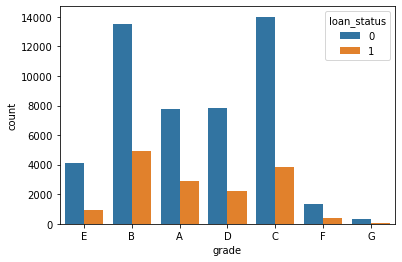

In [13]:
# countplot of the people who paid / are defaulted as per grade
sns.countplot(x = 'grade', data=df, hue='loan_status' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

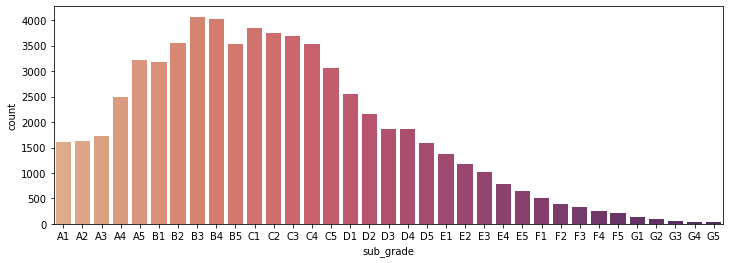

In [14]:
#Distribution of people as per category

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='flare' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

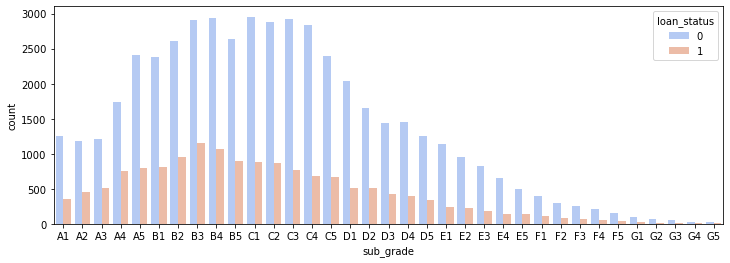

In [15]:
#Distribution of people as per sub-category and have have defaulted their loan

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

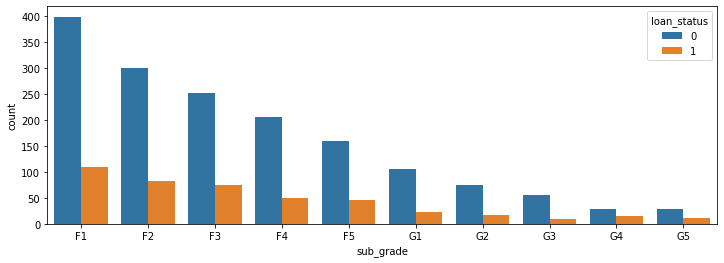

In [16]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

<AxesSubplot:>

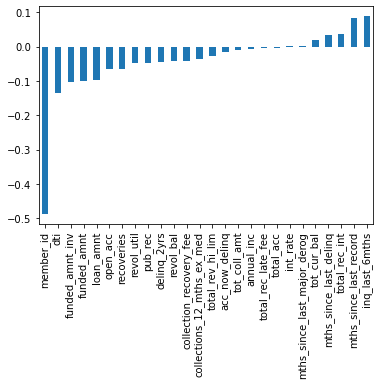

In [17]:
#plt.figure(figsize=(8,8))
df.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')


In [18]:

# Correlation with respect to loan status
df.corr()['loan_status'].sort_values()

member_id                     -0.487251
dti                           -0.134356
funded_amnt_inv               -0.103682
funded_amnt                   -0.099741
loan_amnt                     -0.098061
open_acc                      -0.065030
recoveries                    -0.064841
revol_util                    -0.047682
pub_rec                       -0.047414
delinq_2yrs                   -0.044671
revol_bal                     -0.041665
collection_recovery_fee       -0.041199
collections_12_mths_ex_med    -0.036779
total_rev_hi_lim              -0.027115
acc_now_delinq                -0.013868
tot_coll_amt                  -0.010139
annual_inc                    -0.005600
total_rec_late_fee            -0.002616
total_acc                     -0.002207
int_rate                       0.001316
mths_since_last_major_derog    0.003020
tot_cur_bal                    0.018390
mths_since_last_delinq         0.034516
total_rec_int                  0.038048
mths_since_last_record         0.082552


## Replace Missing Data

In [19]:
df.isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
batch_enrolled                 10264
int_rate                           0
grade                              0
sub_grade                          0
emp_title                       3826
emp_length                      3324
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
desc                           54849
purpose                            0
title                             13
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         32831
mths_since_last_record         54349
open_acc                           0
pub_rec                            0
r

In [20]:
#Percentage of missing values:

100* df.isnull().sum()/len(df)

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 16.037751
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.978218
emp_length                      5.193831
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.702902
purpose                         0.000000
title                           0.020313
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         51.299239
mths_since_last_

In [21]:
# unique batch counts
df['batch_enrolled'].nunique()

102

In [22]:
# unique emp_title
df['emp_title'].nunique()

31609

In [23]:
## Exploring Emp Length

df['emp_length']

0          9 years
1         < 1 year
2          2 years
3        10+ years
4        10+ years
           ...    
63994     < 1 year
63995      2 years
63996      2 years
63997      3 years
63998      5 years
Name: emp_length, Length: 63999, dtype: object

In [24]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [25]:
emp_length_order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

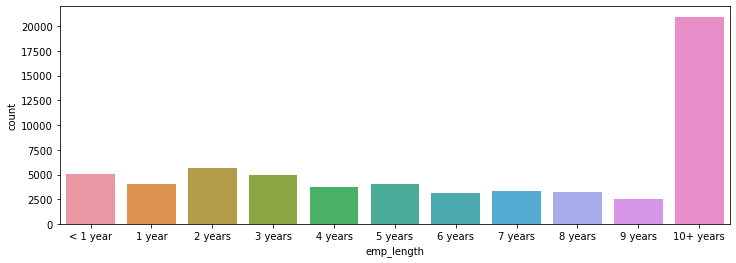

In [26]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

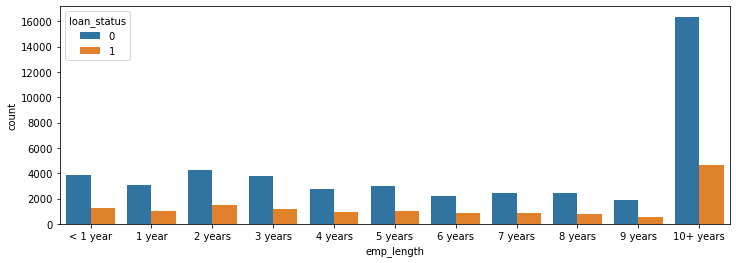

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [28]:
emp_co = df[df['loan_status']==1].groupby("emp_length").count()['loan_status']

In [29]:
emp_fp = df[df['loan_status']==0].groupby("emp_length").count()['loan_status']

In [30]:
emp_len = emp_co/emp_fp

In [31]:

emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.347410
10+ years    0.282699
2 years      0.349041
3 years      0.314067
4 years      0.348153
5 years      0.345266
6 years      0.399552
7 years      0.348933
8 years      0.319087
9 years      0.302301
< 1 year     0.318570
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

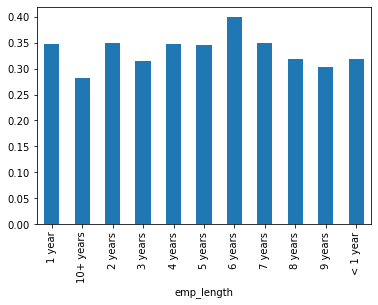

In [32]:

emp_len.plot(kind='bar')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    63999 non-null  int64  
 1   funded_amnt                  63999 non-null  int64  
 2   funded_amnt_inv              63999 non-null  float64
 3   term                         63999 non-null  object 
 4   int_rate                     63999 non-null  float64
 5   grade                        63999 non-null  object 
 6   sub_grade                    63999 non-null  object 
 7   home_ownership               63999 non-null  object 
 8   annual_inc                   63999 non-null  float64
 9   verification_status          63999 non-null  object 
 10  pymnt_plan                   63999 non-null  object 
 11  purpose                      63999 non-null  object 
 12  title                        63986 non-null  object 
 13  zip_code        

In [38]:
df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
grade                              0
sub_grade                          0
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
purpose                            0
title                             13
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         32831
mths_since_last_record         54349
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        29
total_acc                          0
initial_list_status                0
total_rec_int                      0
t

In [39]:
# Title and purpose are same so dropped title

df.drop(['title'],axis=1,inplace=True)

In [40]:
## Droping variables with high missing values
df.drop("verification_status_joint",axis=1,inplace=True)

In [41]:
## Droping variables with high missing values
df.drop(['mths_since_last_delinq','mths_since_last_major_derog'],axis=1,inplace=True)

In [42]:
df.drop(['mths_since_last_record'],axis=1,inplace=True)

In [43]:
df=df.dropna()

In [44]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll

## Dealing with Categorical Data 

In [45]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type', 'last_week_pay'],
      dtype='object')

In [46]:
df['last_week_pay'].nunique()

58

In [47]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [48]:
df['term'].value_counts()

36 months    40773
60 months    18076
Name: term, dtype: int64

In [49]:
#change to intergers only and eliminate months
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\amelia.quek\AppData\Local\Temp\ipykernel_25912\17837576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [50]:
df['term'].unique()

array([36, 60], dtype=int64)

In [51]:
#Grade is part of sub_grade, so just dropped the grade feature.
df = df.drop('grade',axis=1)

In [52]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [53]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [54]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [55]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'zip_code', 'addr_state', 'initial_list_status', 'application_type',
       'last_week_pay'],
      dtype='object')

In [56]:
# Creating dummy variables
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [57]:
df.drop('pymnt_plan',axis=1,inplace=True)

In [58]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'zip_code', 'addr_state', 'last_week_pay'], dtype='object')

In [59]:
df['home_ownership'].value_counts()

MORTGAGE    29689
RENT        23270
OWN          5883
OTHER           4
NONE            2
ANY             1
Name: home_ownership, dtype: int64

In [60]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [61]:
df.select_dtypes(['object']).columns

Index(['zip_code', 'addr_state', 'last_week_pay'], dtype='object')

In [62]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [63]:
dummies = pd.get_dummies(df['addr_state'],drop_first=True)
df = df.drop(['addr_state'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [64]:
dummies = pd.get_dummies(df['last_week_pay'],drop_first=True)
df = df.drop(['last_week_pay'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       ...
       '82th week', '83th week', '87th week', '8th week', '91th week',
       '92th week', '95th week', '96th week', '9th week', 'NAth week'],
      dtype='object', length=1047)

In [66]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Modeling 

In [67]:
#Spliting data
from sklearn.model_selection import train_test_split

In [68]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing Data

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit_transform(X_train)

In [73]:
X_test = scaler.transform(X_test)

## Using SMOTE techinque to overcome data imbalance problem 

In [74]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transact`ions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (47079, 1046)
Number transactions y_train dataset:  (47079,)
Number transact`ions X_test dataset:  (11770, 1046)
Number transactions y_test dataset:  (11770,)


pip install imbalanced-learn

In [76]:

from imblearn.over_sampling import SMOTE

In [77]:
# Oversampling the minority class


sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (76402, 1046)
After OverSampling, the shape of train_y: (76402,) 

After OverSampling, counts of label '1': 38201
After OverSampling, counts of label '0': 38201


## Creating Model 

In [80]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

## Logistic Regression

Highest AUC Score was achieved using Logistic Regression

In [81]:
# Used grid searchCV to find the best parameters
log_clf = LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
log_clf.fit(X_train_res,y_train_res)

LogisticRegression(C=1.9909999999999997, class_weight='balanced',
                   random_state=7, solver='liblinear')

In [83]:
pred=log_clf.predict_proba(X_test)

In [84]:
log_roc_auc=roc_auc_score(y_test,pred[:,1])

(2.0, 0.0)

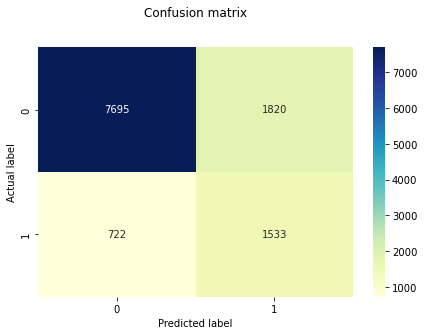

In [85]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_clf.predict(X_test))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.ylim(2,0)

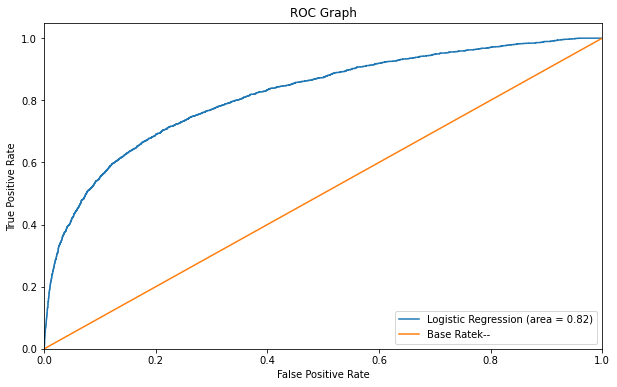

In [86]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [87]:
print('The AUC Score of the Logistic model is: %.3f' %log_roc_auc)

The AUC Score of the Logistic model is: 0.818
